In [1]:
#必要なライブラリをインストールする
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#pandasを用いてcsvファイルを読み込む
#一度データを確認し，valueが?になっている部分をNaNにreplaceする
df_full = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
df_full

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
#読み込んだデータの要素数とtypeを調べる
#dtypeのobjectは後々変更する
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
#データの?ををna.nan（NAN）にreplaceする
df_fullna=df_full.replace('?',np.nan)
df_fullna

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
#データ内のカラムに対するnull,NaNの個数を調べる
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [6]:
df=df_fullna

In [7]:
#データ型をobjectからfloatに変更する
df=df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [9]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
#nullを全て中央値で埋める＝＞ドメイン知識がある場合はそれに適した値に変更する
for i in df.keys():
    df[i] = df[i].fillna(df[i].median())

In [11]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [12]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#今回の特徴量変数ではないone-hot形式のカラムにダミー変数を追加する．
list = []
for i in df.keys():
    dummy = True
    for k in df[i]:
        if k !=0.0 and k != 1.0:
            dummy = False
            break
    if dummy:
        list.append(i)
list

['Smokes',
 'Hormonal Contraceptives',
 'IUD',
 'STDs',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

In [14]:
#今回推論に使用する特徴量変数以外
list.remove("Biopsy")

In [15]:
list

['Smokes',
 'Hormonal Contraceptives',
 'IUD',
 'STDs',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [16]:
#作成したリストに対応するカラムを全てダミー変数化
#このようにすることで，先まで有効数字第一位まで存在していたカラムが0,1に置き換えられる=>使いやすくなる？？
df = pd.get_dummies(data=df,columns=list)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Dx:HPV_0.0,Dx:HPV_1.0,Dx_0.0,Dx_1.0,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
0,18.0,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,52.0,5.0,16.0,4.0,37.0,37.0,3.00,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4,46.0,3.0,21.0,4.0,0.0,0.0,15.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
854,32.0,2.0,19.0,1.0,0.0,0.0,8.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,0,1
856,33.0,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [17]:
df.isnull().sum()

Age                                       0
Number of sexual partners                 0
First sexual intercourse                  0
Num of pregnancies                        0
Smokes (years)                            0
Smokes (packs/year)                       0
Hormonal Contraceptives (years)           0
IUD (years)                               0
STDs (number)                             0
STDs: Number of diagnosis                 0
STDs: Time since first diagnosis          0
STDs: Time since last diagnosis           0
Biopsy                                    0
Smokes_0.0                                0
Smokes_1.0                                0
Hormonal Contraceptives_0.0               0
Hormonal Contraceptives_1.0               0
IUD_0.0                                   0
IUD_1.0                                   0
STDs_0.0                                  0
STDs_1.0                                  0
STDs:condylomatosis_0.0                   0
STDs:condylomatosis_1.0         

In [18]:
#これにてデータ解析する前処理が終了する．
#まとめるとデータの？をNaNに置き換える
#データのtypeをobjectからfloatに変更する．
#データのNaN値を何かしらの値で埋める（今回は中央値）
#データカラム内の0,1で表されるものを特徴量変数以外ダミー変数に変更する．

In [19]:
#この後はデータを訓練データとテストデータに分割し，要素数やラベルなどを決定し，normalizationする

In [20]:
df_data=df

In [21]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Dx:HPV_0.0,Dx:HPV_1.0,Dx_0.0,Dx_1.0,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.087413,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.913753,0.086247,0.948718,0.051282
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.302545,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.280892,0.280892,0.220701,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='STDs (number)', ylabel='count'>

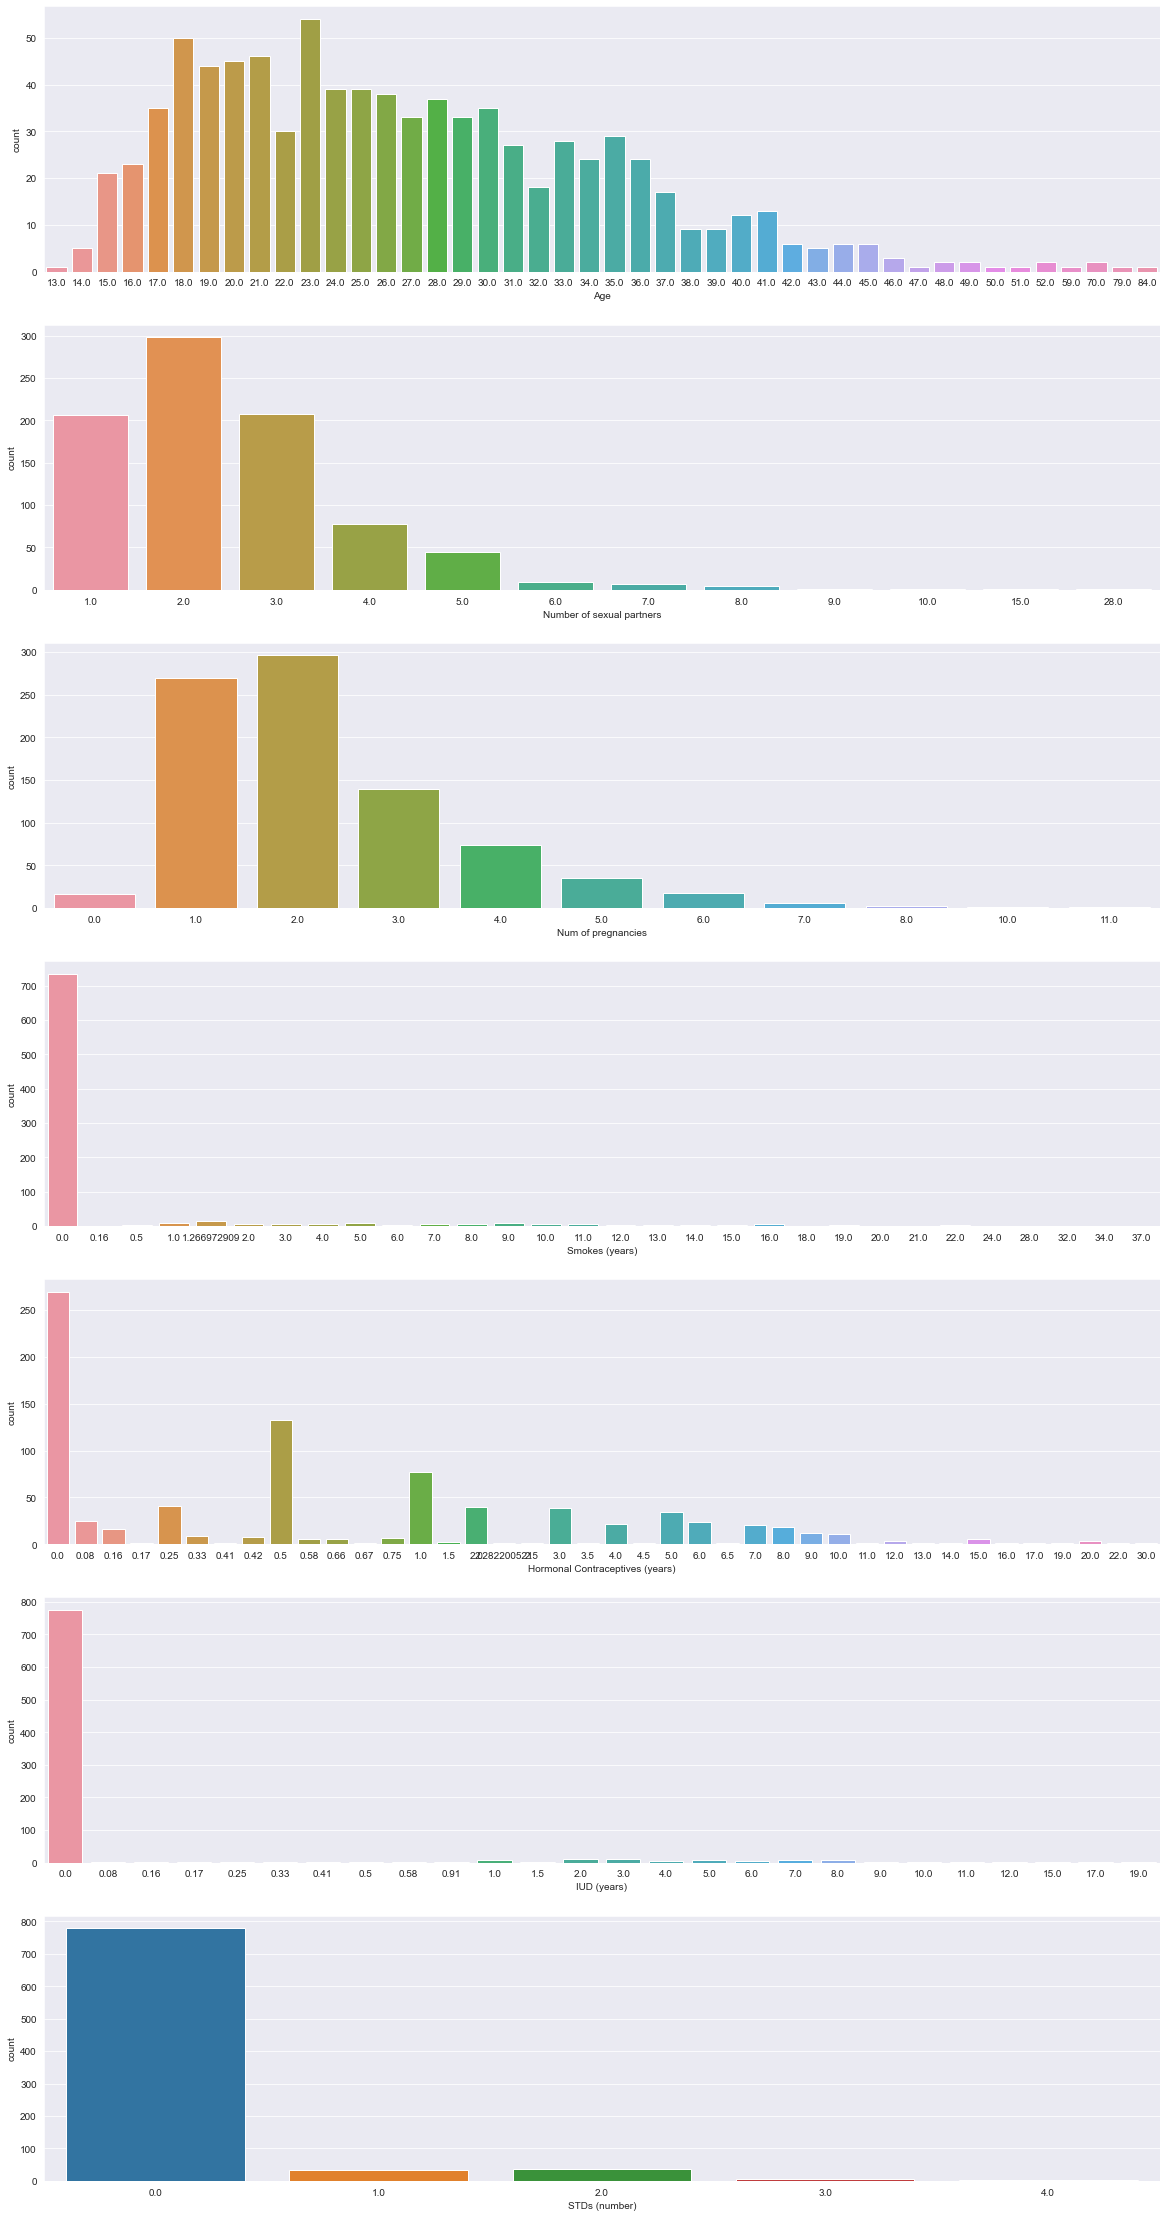

In [22]:
#seabornやpltを使用して変数とcountの関係性を可視化することができる
#統計学の知識が増えてきたらここら辺も活用していきたい
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

In [23]:
#訓練データとテストデータを作成していく
#まずはデータをシャッフルする
np.random.seed(42)
df_data_shuffle = df_data.iloc[np.random.permutation(len(df_data))]

In [24]:
#訓練データとテストデータを4:1に分割する
df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[:686: , :]

In [25]:
#特徴量とラベルを作成 =>特徴量はデータの要素？結果判定したいカラム以外のもの
#ラベルは結果判定したいカラムのこと
#テストデータと訓練データ両方に対してやってあげる必要がある

In [26]:
list = []
for i in df.keys():
    list.append(i)
list.remove("Biopsy")
list

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Smokes_0.0',
 'Smokes_1.0',
 'Hormonal Contraceptives_0.0',
 'Hormonal Contraceptives_1.0',
 'IUD_0.0',
 'IUD_1.0',
 'STDs_0.0',
 'STDs_1.0',
 'STDs:condylomatosis_0.0',
 'STDs:condylomatosis_1.0',
 'STDs:cervical condylomatosis_0.0',
 'STDs:vaginal condylomatosis_0.0',
 'STDs:vaginal condylomatosis_1.0',
 'STDs:vulvo-perineal condylomatosis_0.0',
 'STDs:vulvo-perineal condylomatosis_1.0',
 'STDs:syphilis_0.0',
 'STDs:syphilis_1.0',
 'STDs:pelvic inflammatory disease_0.0',
 'STDs:pelvic inflammatory disease_1.0',
 'STDs:genital herpes_0.0',
 'STDs:genital herpes_1.0',
 'STDs:molluscum contagiosum_0.0',
 'STDs:molluscum contagiosum_1.0',
 'STDs:AIDS_0.0',
 'STDs:HIV_0.0',
 'STDs:HIV_1

In [27]:
df_train_feature = df_train[list]
train_label = np.array(df_train["Biopsy"])
df_test_feature = df_test[list]
test_label = np.array(df_test["Biopsy"])

In [28]:
#データのノーマライゼーション　＝＞　特徴量変数を 0 ~ 1の値に変更している
from sklearn import preprocessing
#最大値と最小値のレンジを求めている
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
#求めたレンジで各featureの値を割っている
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [29]:
#Make sure if it's the shape what we want!
print(train_feature[0])
print(train_label[0])
print(test_feature[0])
print(test_label[0])

[0.14084507 0.07407407 0.31818182 0.18181818 0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         0.         1.
 0.         1.         0.         1.         0.         1.
 0.         1.         0.         0.         0.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.        ]
0.0
[0.04225352 0.         0.27272727 0.09090909 0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         0.         1.
 0.         1.         0.         1.         0.         1.
 0.         1.         0.         0.         0.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.

In [30]:
#深層学習モデルにぶち込むためにshapeを確認する
train_feature.shape
#タプルの56の部分が次元数になっている

(685, 56)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               28500     
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 128,901
Trainable params: 128,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3/3 - 1s - loss: 0.6537 - accuracy: 0.7372 - val_loss: 0.5597 - val_accuracy: 0.9124
Epoch 2/20
3/3 

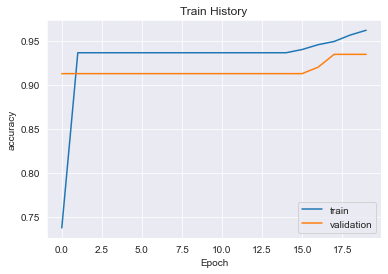

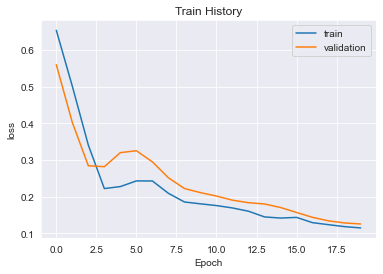

In [31]:
#The model should run very fast because the data was really small.
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


######################### Model designing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 

#Input layer
model.add(Dense(units=500, 
                input_dim=56, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 1
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #for showing the structure and parameters

# Defining how to measure performance
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

# Train the model
# Verbose=2, showing loss and accuracy change timely
train_history = model.fit(x=train_feature, y=train_label,  
                          validation_split=0.2, epochs=20, 
                          batch_size=200, verbose=2) 

#visualize the loss and accuracy after each epoch
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [32]:
#学習が終わったりモデルを作成できたのでモデルの推論のaccを求める
scores = model.evaluate(test_feature,test_label)
print('\n')
print('accuracy=',scores[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9548


accuracy= 0.9548105001449585


In [33]:
#提出するcsvデータを作成する
#ラベルとpredictionの二つのカラムからなるcsvにする
# Answer sheet
prediction = model.predict_classes(test_feature)

In [34]:
# Create a dataframe for prediction and correct answer
df_ans = pd.DataFrame({'Biopsy' :test_label})
df_ans['Prediction'] = prediction
df_ans

,Biopsy,Prediction
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
681,1.0,0
682,0.0,0
683,0.0,0
684,0.0,0


In [35]:
#predとbiopsyの違いを見る
df_ans[ df_ans['Biopsy'] != df_ans['Prediction'] ]

,Biopsy,Prediction
106,1.0,0
125,1.0,0
126,1.0,0
145,1.0,0
158,1.0,0
159,1.0,0
164,0.0,1
215,1.0,0
247,1.0,0
283,1.0,0


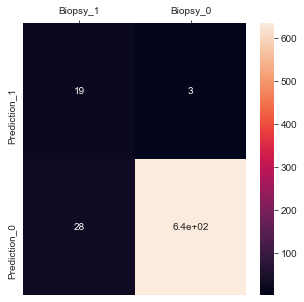

In [36]:
#予測モデルのパフォーマンスを測るためにconfusion matrixを作成する
#2値分類のマトリクスで1の時1になるか，0の時0になるかの個数をマトリクスで表示
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [37]:
#Calculating sensitivity, specificity, false_positive_rate and false_negative_rate
def model_efficacy(conf):
    total_num = np.sum(conf)
    #正しく陽性（正しくBiopsy）だと判断できたレート
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    #正しく陰性（正しくBiopsyではない）と判断できたレート
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    #偽陽性＝＞間違ってBiopsyだと判断してしまった割合
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    #偽陰性＝＞間違ってBiopsyではないと判断してしまった割合
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  686
G1P1:  19
G0P1:  3
G1P0:  28
G0P0:  636
##########################
sensitivity:  0.40425531914893614
specificity:  0.9578313253012049
false_positive_rate:  0.004694835680751174
false_negative_rate:  0.5957446808510638


(686,
 0.40425531914893614,
 0.9578313253012049,
 0.004694835680751174,
 0.5957446808510638)

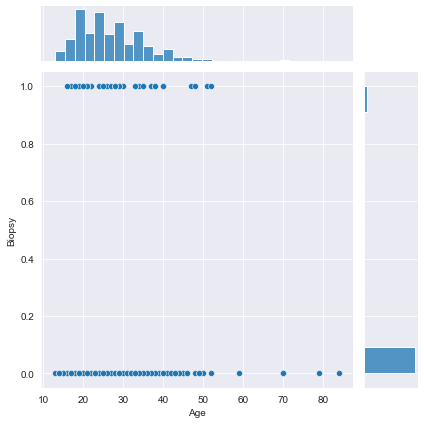

In [38]:
#次に特徴量変数とラベルの相関関係について見ていく
sns.jointplot(x="Age",y="Biopsy",data=df)

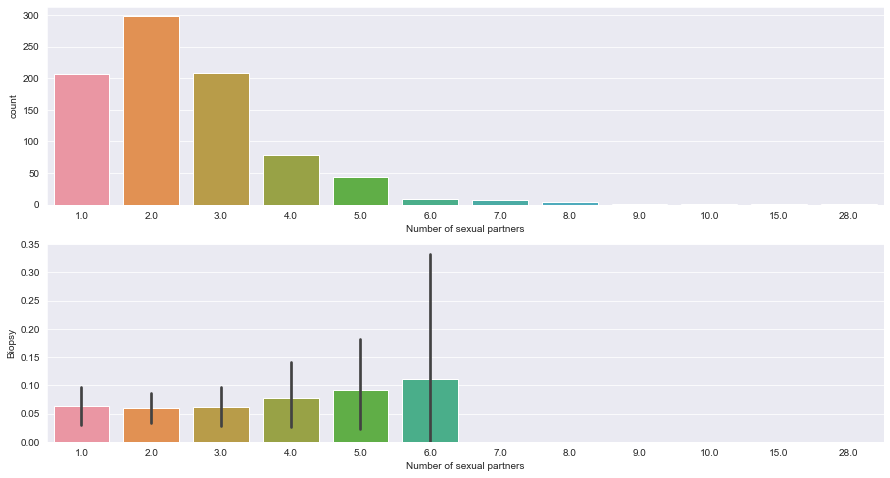

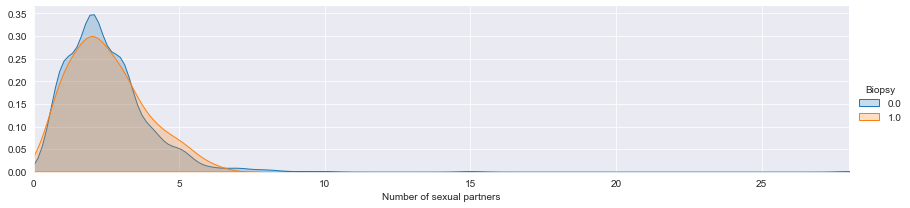

In [39]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=df, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=df, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, df['Number of sexual partners'].max()))
facet.add_legend()

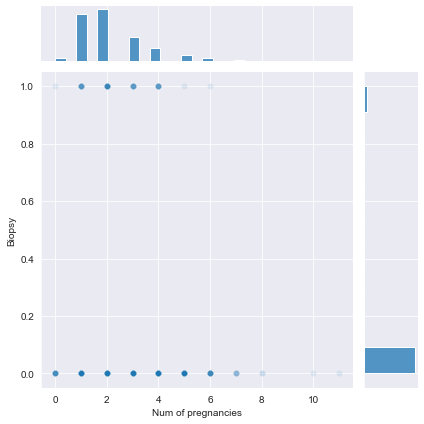

In [40]:
import seaborn as sns
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=df, alpha=0.1) 

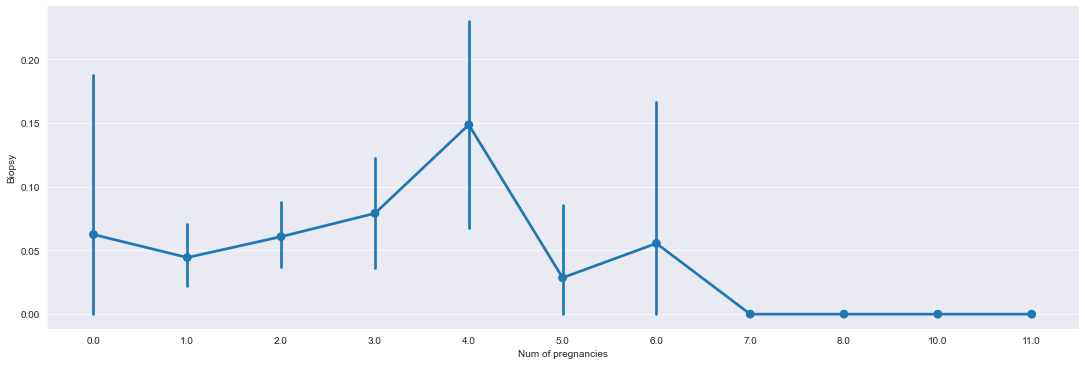

In [41]:
sns.factorplot('Num of pregnancies','Biopsy',data=df, size=5, aspect=3)

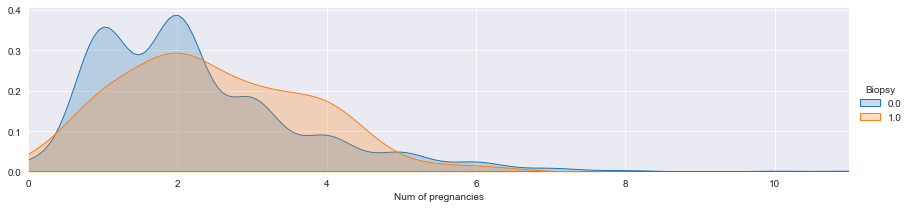

In [42]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

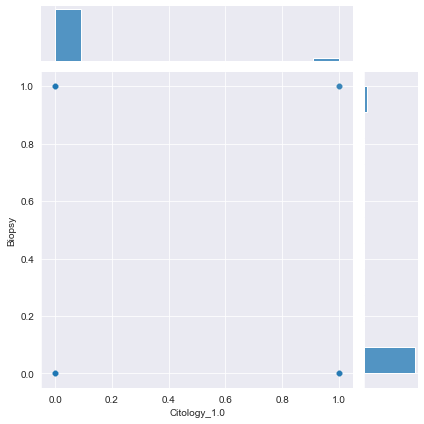

In [43]:
import seaborn as sns
sns.jointplot(x='Citology_1.0', y='Biopsy', data=df, alpha=0.1) 
# Hard do see anything...

<AxesSubplot:xlabel='Citology_1.0', ylabel='Biopsy'>

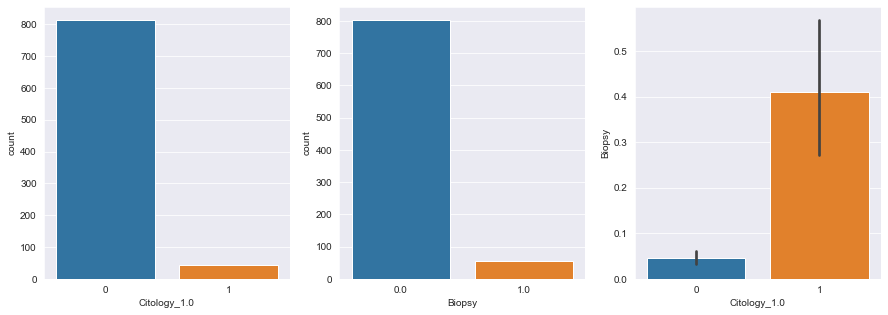

In [44]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Citology_1.0', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Citology_1.0', y='Biopsy', data=df, ax=axis3)  #categorical to categorical

<AxesSubplot:xlabel='Schiller_1.0', ylabel='Biopsy'>

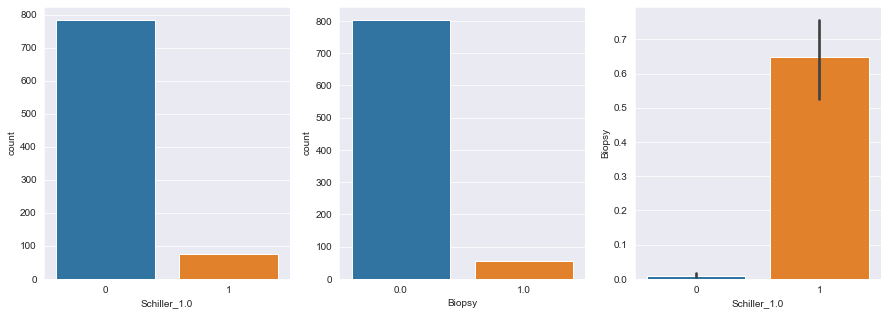

In [45]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller_1.0', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Schiller_1.0', y='Biopsy', data=df, ax=axis3) #categorical to categorical

<AxesSubplot:>

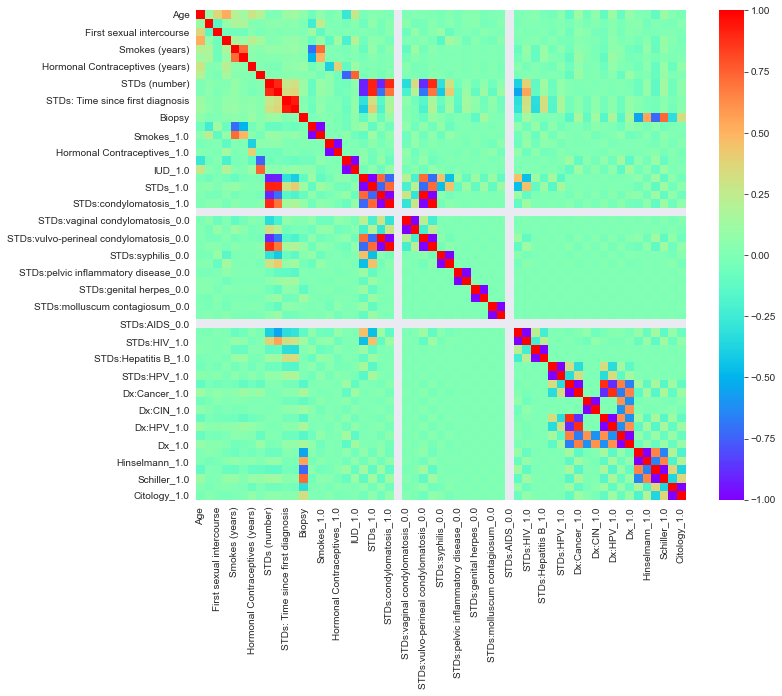

In [46]:
#要素間の相関関係を手っ取り早くみる
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

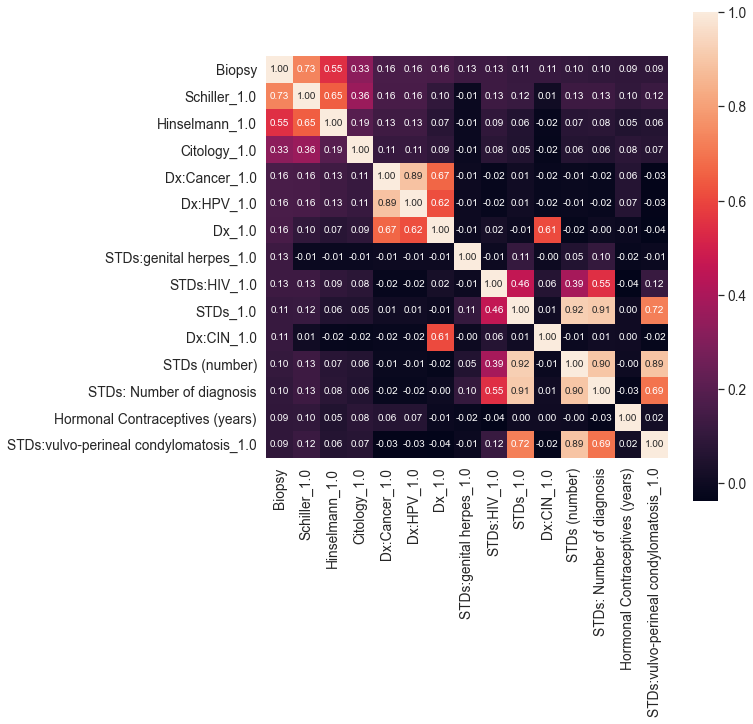

In [47]:
#Schiller_1」、「Hinselmann_1」、「Cytology_1」は、生検(+)との相関性が最も高かったようです。
#この結果は、医学的知識の常識と一致しています。特異性の高い診断ツールは、偽陽性率が低い。
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(9,9)) #可以調整大小

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [48]:
#相関関係の高かったものだけを抽出して学習してみる
delete_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'STDs:condylomatosis_0.0',
       'STDs:condylomatosis_1.0', 'STDs:cervical condylomatosis_0.0',
       'STDs:vaginal condylomatosis_0.0', 'STDs:vaginal condylomatosis_1.0',
       'STDs:vulvo-perineal condylomatosis_0.0',
       'STDs:vulvo-perineal condylomatosis_1.0', 'STDs:syphilis_0.0',
       'STDs:syphilis_1.0', 'STDs:pelvic inflammatory disease_0.0',
       'STDs:pelvic inflammatory disease_1.0', 'STDs:genital herpes_0.0',
       'STDs:genital herpes_1.0', 'STDs:molluscum contagiosum_0.0',
       'STDs:molluscum contagiosum_1.0', 'STDs:AIDS_0.0', 'STDs:HIV_0.0',
       'STDs:HIV_1.0', 'STDs:Hepatitis B_0.0', 'STDs:Hepatitis B_1.0',
       'STDs:HPV_0.0', 'STDs:HPV_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0',
       'Dx:CIN_0.0', 'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0',
       'Dx_1.0']

ori_df = df
ori_df.drop(delete_columns,axis=1,inplace=True)
ori_df

,Biopsy,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
0,0.0,1,0,1,0,1,0
1,0.0,1,0,1,0,1,0
2,0.0,1,0,1,0,1,0
3,0.0,1,0,1,0,1,0
4,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...
853,0.0,1,0,1,0,1,0
854,0.0,1,0,1,0,1,0
855,0.0,1,0,1,0,0,1
856,0.0,1,0,1,0,1,0


In [49]:
#訓練データとテストデータを作成していく
#まずはデータをシャッフルする
np.random.seed(42)
df_data_shuffle = ori_df.iloc[np.random.permutation(len(ori_df))]

In [50]:
df_data_shuffle

,Biopsy,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
713,0.0,1,0,1,0,1,0
604,0.0,1,0,1,0,1,0
120,0.0,1,0,1,0,1,0
208,0.0,1,0,1,0,1,0
380,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...
71,0.0,1,0,1,0,1,0
106,0.0,1,0,1,0,1,0
270,0.0,1,0,1,0,1,0
435,0.0,1,0,1,0,1,0


In [53]:
df_train = df_data_shuffle.iloc[1:686,:]
df_train
df_test = df_data_shuffle.iloc[:686:,:]
df_test

,Biopsy,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
713,0.0,1,0,1,0,1,0
604,0.0,1,0,1,0,1,0
120,0.0,1,0,1,0,1,0
208,0.0,1,0,1,0,1,0
380,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...
472,1.0,0,1,0,1,1,0
347,0.0,1,0,1,0,1,0
505,0.0,1,0,1,0,1,0
639,0.0,1,0,1,0,1,0


In [54]:
list = []
for i in df.keys():
    list.append(i)
list.remove("Biopsy")
list

['Hinselmann_0.0',
 'Hinselmann_1.0',
 'Schiller_0.0',
 'Schiller_1.0',
 'Citology_0.0',
 'Citology_1.0']

In [55]:
df_train_feature = df_train[list]
train_label = np.array(df_train["Biopsy"])
df_test_feature = df_test[list]
test_label = np.array(df_test["Biopsy"])

In [56]:
#データのノーマライゼーション　＝＞　特徴量変数を 0 ~ 1の値に変更している
from sklearn import preprocessing
#最大値と最小値のレンジを求めている
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
#求めたレンジで各featureの値を割っている
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [57]:
#Make sure if it's the shape what we want!
print(train_feature[0])
print(train_label[0])
print(test_feature[0])
print(test_label[0])

[1. 0. 1. 0. 1. 0.]
0.0
[1. 0. 1. 0. 1. 0.]
0.0


In [58]:
#深層学習モデルにぶち込むためにshapeを確認する
train_feature.shape
#タプルの56の部分が次元数になっている

(685, 6)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               3500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 103,901
Trainable params: 103,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
3/3 - 1s - loss: 0.6824 - accuracy: 0.6989 - val_loss: 0.6498 - val_accuracy: 0.9124
Epoch 2/15
3/

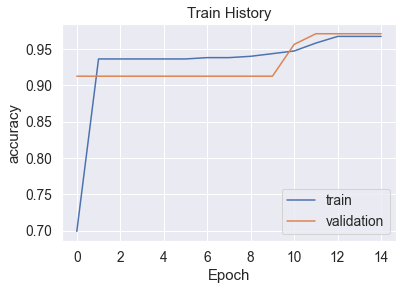

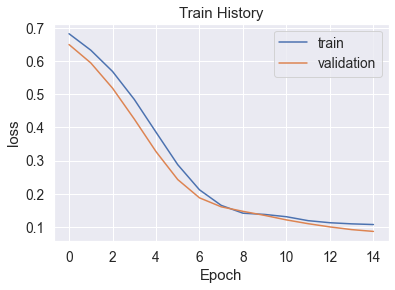

In [59]:
#The model should run very fast because the data was really small.
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


######################### Model designing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 

#Input layer
model.add(Dense(units=500, 
                input_dim=6, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 1
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #for showing the structure and parameters

# Defining how to measure performance
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

# Train the model
# Verbose=2, showing loss and accuracy change timely
train_history = model.fit(x=train_feature, y=train_label,  
                          validation_split=0.2, epochs=15, 
                          batch_size=200, verbose=2) 

#visualize the loss and accuracy after each epoch
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [60]:
#学習が終わったりモデルを作成できたのでモデルの推論のaccを求める
scores = model.evaluate(test_feature,test_label)
print('\n')
print('accuracy=',scores[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9679


accuracy= 0.967930018901825


In [61]:
#提出するcsvデータを作成する
#ラベルとpredictionの二つのカラムからなるcsvにする
# Answer sheet
prediction = model.predict_classes(test_feature)

In [62]:
# Create a dataframe for prediction and correct answer
df_ans = pd.DataFrame({'Biopsy' :test_label})
df_ans['Prediction'] = prediction
df_ans

,Biopsy,Prediction
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
681,1.0,1
682,0.0,0
683,0.0,0
684,0.0,0
